# 📘 Logistic Regression - Notes

## 🧠 What is Logistic Regression?

- Logistic Regression is a **supervised classification** algorithm used to **predict binary outcomes** (1/0, True/False, Yes/No).
- It estimates the probability that a given input point belongs to a certain class.

---

## 📈 Logistic vs Linear Regression

| Feature                | Linear Regression          | Logistic Regression         |
|------------------------|----------------------------|-----------------------------|
| Output                 | Continuous                 | Categorical (probability)   |
| Use Case               | Predicting values          | Classification              |
| Function Used          | Line (y = mx + c)          | Sigmoid Function            |
| Range of Output        | (-∞, ∞)                    | (0, 1)                      |

---

## 🧮 Sigmoid Function

\[
\sigma(z) = \frac{1}{1 + e^{-z}}
\]

- Converts any real value into a range between **0 and 1**.
- Used to model the probability of the default class.

---

## ✅ Model Prediction

- If \( P(y=1|x) \geq 0.5 \): Class = 1  
- If \( P(y=1|x) < 0.5 \): Class = 0

---

## 📊 Cost Function (Log Loss)

\[
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)}))]
\]

- Helps the algorithm to minimize error in predictions.

---

## ⚙️ Gradient Descent (Optimization)

- Used to minimize the **cost function**.
- Updates weights using:

\[
\theta = \theta - \alpha \cdot \nabla J(\theta)
\]

---

## 🧪 Evaluation Metrics

- **Accuracy**
- **Precision / Recall / F1 Score**
- **Confusion Matrix**
- **ROC-AUC Curve**

---

## 📚 Example Use Cases

- Email Spam Detection
- Customer Churn Prediction
- Disease Diagnosis
- Click Prediction (e.g., Ads)

---

## ✅ Pros

- Easy to implement and interpret
- Works well for linearly separable data
- Efficient for binary classification

---

## ❌ Cons

- Struggles with non-linear relationships
- Not ideal for multiclass problems without extension (e.g., one-vs-rest)
- Sensitive to outliers

---

## 📦 Common Libraries in Python

```python
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/social-network-adscsv/Social_Network_Ads.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv(r"/kaggle/input/social-network-adscsv/Social_Network_Ads.csv")
dataset

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [4]:
dataset.drop("EstimatedSalary", axis=1, inplace=True)
dataset

,Age,Purchased
0,19,0
1,35,0
2,26,0
3,27,0
4,19,0
...,...,...
395,46,1
396,51,1
397,50,1
398,36,0


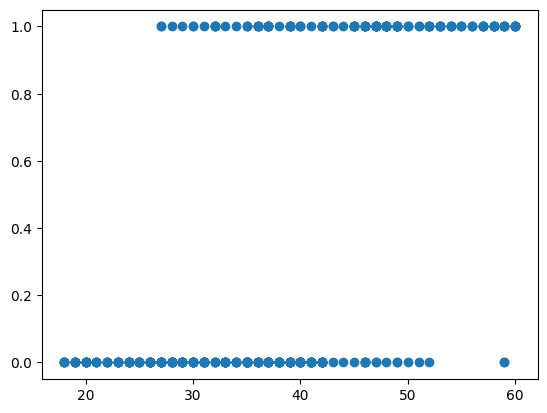

In [5]:
plt.scatter(x="Age",y="Purchased",data=dataset)
plt.show()

In [6]:
x = dataset[["Age"]]
y = dataset["Purchased"]

In [7]:
from sklearn.model_selection import train_test_split 

In [8]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr

LogisticRegression()

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=43)

In [10]:
lr.fit(x_train,y_train)


LogisticRegression()

In [11]:
lr.score(x_test,y_test)

0.8125

In [12]:
lr.coef_

array([[0.19562892]])

In [13]:
lr.intercept_

array([-8.31215933])

In [14]:
y_pred= lr.predict([[40]])
y_pred

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


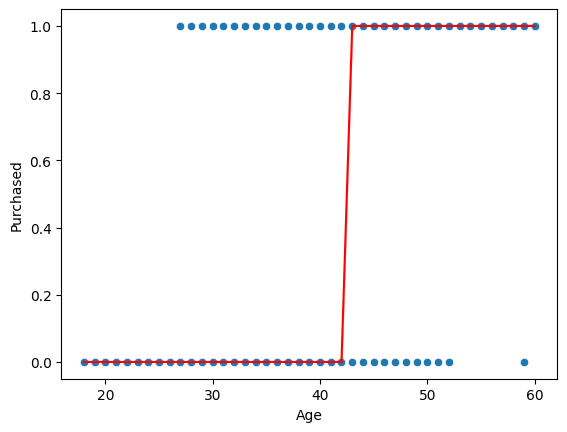

In [15]:
sns.scatterplot(x="Age",y="Purchased",data=dataset)
sns.lineplot(x=dataset["Age"],y=lr.predict(x),color='red')
plt.show()